In [3]:
!pip install earthpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 63.3 MB/s eta 0:00:00


In [7]:
# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import geopandas as gpd

# Load the box module from shapely to create box objects
from shapely.geometry import box
import earthpy as et
import seaborn as sns

# Ignore warning about missing/empty geometries
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")


country_boundary_us = gpd.read_file('/content/drive/MyDrive/Earth data Analytics/earth-analytics/data/spatial_vector_lidar/usa/usa-boundary-dissolved.shp')

state_boundary_us = gpd.read_file('/content/drive/MyDrive/Earth data Analytics/earth-analytics/data/spatial_vector_lidar/usa/usa-states-census-2014.shp')

pop_places_world = gpd.read_file('/content/drive/MyDrive/Earth data Analytics/earth-analytics/data/spatial_vector_lidar/global/ne_110m_populated_places_simple/ne_110m_populated_places_simple.shp')

# Are the data all in the same crs?
print("country_boundary_us", country_boundary_us.crs)
print("state_boundary_us", state_boundary_us.crs)
print("pop_places_world", pop_places.crs)

country_boundary_us EPSG:4326
state_boundary_us EPSG:4326
pop_places_world EPSG:4326


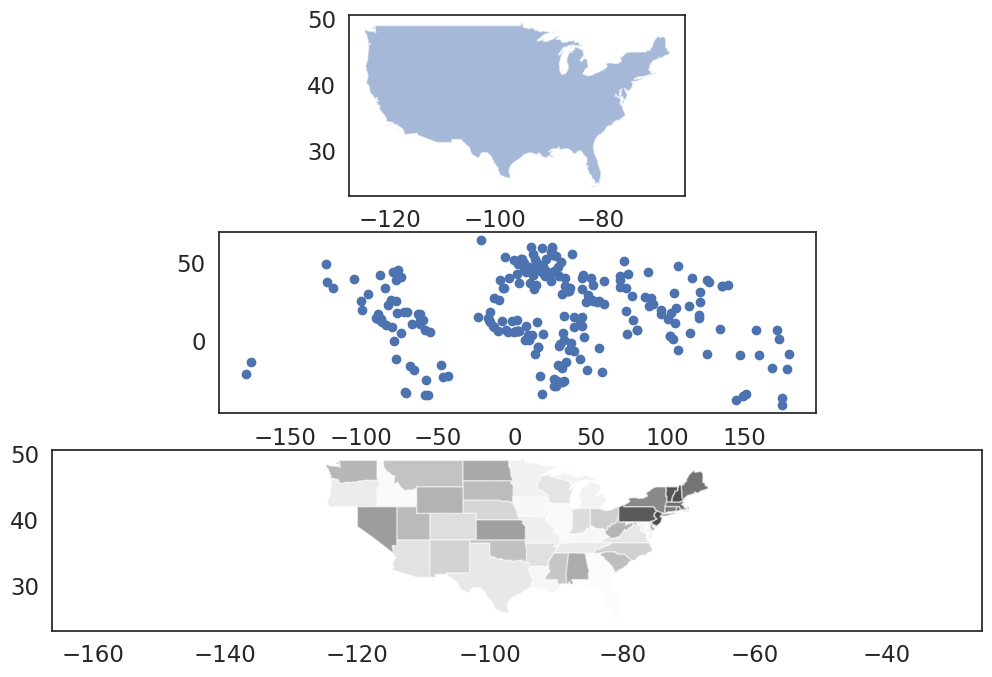

In [16]:
# Plot the data
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,figsize=(12, 8))

country_boundary_us.plot(alpha=.5,
                         ax=ax1)

state_boundary_us.plot(cmap='Greys',
                       ax=ax3,
                       alpha=.5)
pop_places_world.plot(ax=ax2)

plt.axis('equal')
ax.set_axis_on()
plt.show()

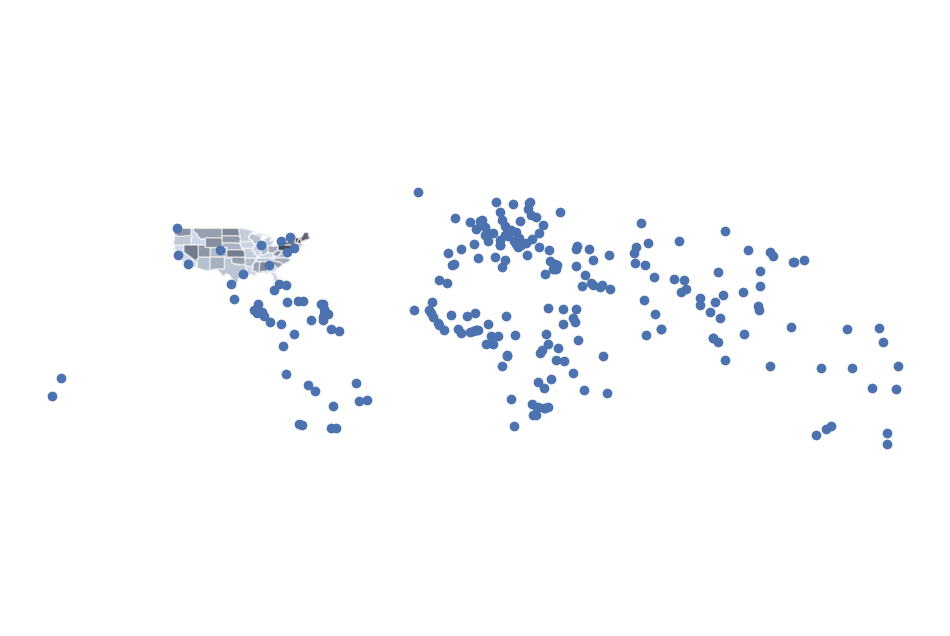

In [15]:
fig, ax= plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=.5,
                         ax=ax)

state_boundary_us.plot(cmap='Greys',
                       ax=ax,
                       alpha=.5)
pop_places_world.plot(ax=ax)

plt.axis('equal')
ax.set_axis_off()
plt.show()

In [19]:
point_clip = pop_places_world.clip(country_boundary_us)
point_clip.head()

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,diffascii,nameascii,adm0cap,...,pop_other,rank_max,rank_min,geonameid,meganame,ls_name,ls_match,checkme,min_zoom,geometry
178,1,300,1,Populated place,Miami,None,None,0,Miami,0.0,...,1037811,13,10,4164138.0,Miami,Miami,1,0,2.1,POINT (-80.22605 25.78956)
177,1,300,1,Populated place,Houston,None,None,0,Houston,0.0,...,3607616,12,12,4699066.0,Houston,Houston,1,0,3.0,POINT (-95.34193 29.82192)
179,1,300,1,Admin-1 capital,Atlanta,None,None,0,Atlanta,0.0,...,2874096,12,10,4180439.0,Atlanta,Atlanta,1,0,3.0,POINT (-84.4019 33.83196)
216,0,600,1,Populated place,Los Angeles,None,Los Angeles-Long Beach-Santa Ana,0,Los Angeles,0.0,...,142265,14,12,5368361.0,Los Angeles-Long Beach-Santa Ana,Los Angeles1,1,0,2.0,POINT (-118.18193 33.99192)
175,1,300,1,Populated place,San Francisco,None,San Francisco-Oakland,0,San Francisco,0.0,...,27400,12,11,5391959.0,San Francisco-Oakland,San Francisco1,1,0,2.7,POINT (-122.41717 37.7692)


In [21]:
point_clip[['name','geometry','scalerank','natscale']].tail()

,name,geometry,scalerank,natscale
175,San Francisco,POINT (-122.41717 37.7692),1,300
217,"Washington, D.C.",POINT (-77.01136 38.9015),0,600
176,Denver,POINT (-104.98596 39.74113),1,300
218,New York,POINT (-73.98196 40.75192),0,600
180,Chicago,POINT (-87.752 41.83194),1,300


<ipython-input-41-a43952ee3903>:9: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  point_clip.plot(ax=ax, column='name', color='black')


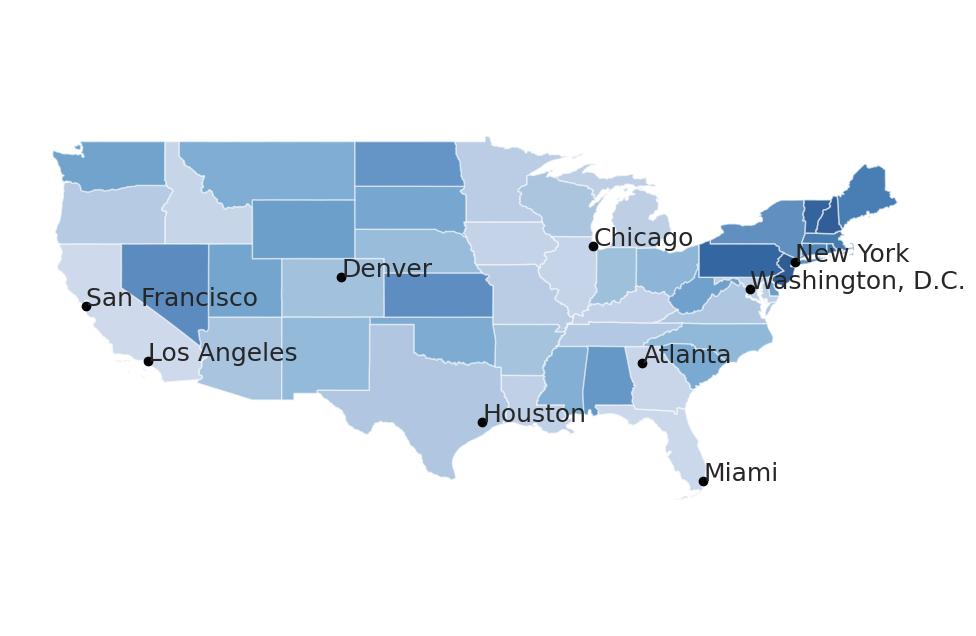

In [41]:
fig, ax= plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=.5,
                         ax=ax)

state_boundary_us.plot(cmap='Blues',
                       ax=ax,
                       alpha=.5)
point_clip.plot(ax=ax, column='name', color='black')
ax.set_axis_off()
plt.axis('equal')
point_clip.apply(lambda x: ax.annotate(text=x['name'],
                                        xy=x.geometry.centroid.coords[0],
                                        ha='left'), axis=1);

plt.show()

In [66]:
world_roads= gpd.read_file('/content/drive/MyDrive/Earth data Analytics/earth-analytics/data/spatial_vector_lidar/global/ne_10m_roads/ne_10m_roads.shp')
bd_admin= gpd.read_file('/content/drive/MyDrive/python open source spatial programming and remote sensing/bd_districts/bgd_admbnda_adm2_bbs_20201113.shp')
us_road= world_roads.clip(country_boundary_us)
print(world_roads.crs)
print(bd_admin.crs)
print(us_road.crs)

EPSG:4326
EPSG:4326
EPSG:4326


In [68]:
bd_roads = world_roads.clip(bd_admin)
bd_roads.head()

,geometry
33799,"LINESTRING (91.92009 22.32803, 91.93659 22.323..."
33464,"LINESTRING (91.38804 23.00856, 91.40042 22.992..."
33373,"LINESTRING (90.00224 22.50125, 89.99399 22.534..."
33283,"LINESTRING (89.80014 22.67035, 89.77539 22.678..."
33268,"LINESTRING (89.23097 23.15704, 89.16498 23.132..."


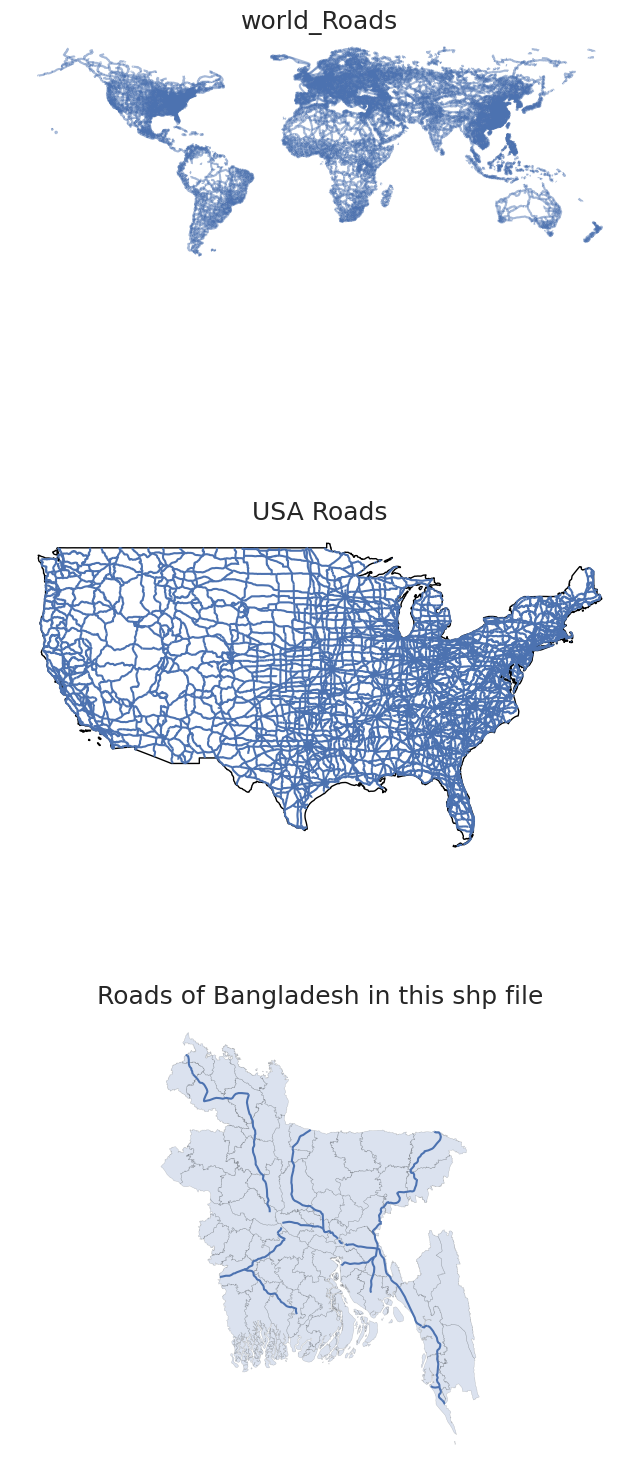

In [94]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(8, 20))
world_roads.plot(alpha=.5, ax=ax1)
us_road.plot(ax=ax2)
country_boundary_us.plot(ax=ax2,color='white', edgecolor='black')
bd_roads.plot(ax=ax3)
bd_admin.plot(ax=ax3,edgecolor='black', linewidth=.3, alpha=.2)
ax1.set_title('world_Roads')
ax2.set_title('USA Roads')
ax3.set_title('Roads of Bangladesh in this shp file')

plt.axis('equal')
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
plt.show()

In [92]:
us_road.head()

,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,...,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
2726,6,Road,Secondary Highway,USA,None,New in version 2.0.0,1,None,None,None,...,0,0,None,234205,North America,0,Federal,6.0,8.5,"MULTILINESTRING Z ((-81.79362 24.55245 0, -81...."
2725,6,Road,Secondary Highway,USA,None,New in version 2.0.0,1,None,None,None,...,0,0,None,234105,North America,0,Federal,6.0,8.5,"LINESTRING Z (-80.39393 25.18804 0, -80.42519 ..."
4144,5,Road,Major Highway,USA,None,New in version 2.0.0,1,None,None,None,...,0,0,None,234105,North America,1,Federal,5.0,8.0,"LINESTRING Z (-80.47728 25.45343 0, -80.47728 ..."
49423,8,Road,Major Highway,USA,None,New in version 2.0.0,821,None,None,None,...,0,771,None,8466,North America,0,State,7.1,9.6,"LINESTRING Z (-80.47449 25.45297 0, -80.42964 ..."
2709,3,Road,Major Highway,USA,None,New in version 2.0.0,75,None,None,None,...,0,0,None,232105,North America,1,Interstate,3.0,6.0,"LINESTRING Z (-81.67206 26.15532 0, -81.73284 ..."


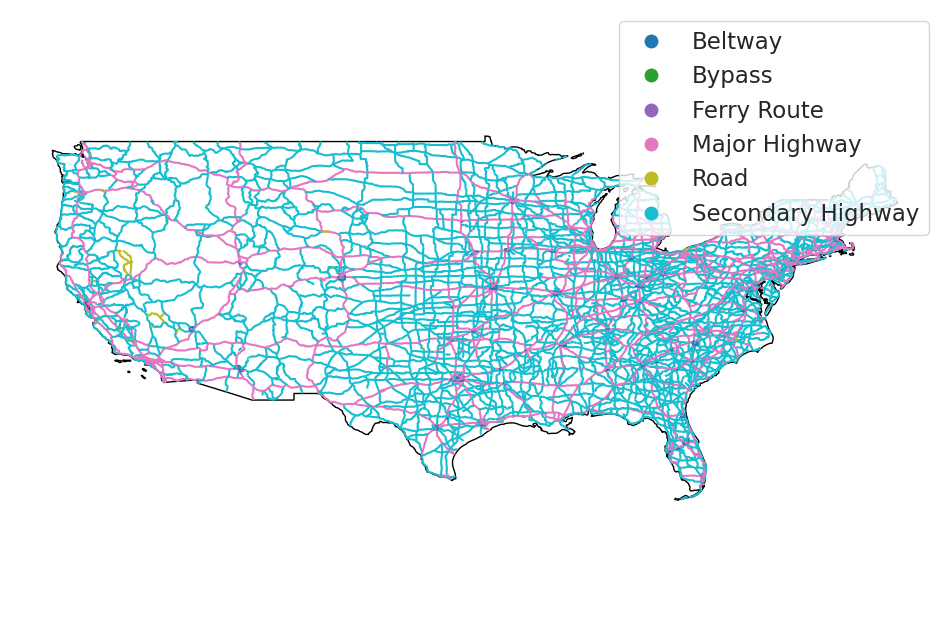

In [91]:
# Plot the data by attribute
fig, ax = plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=1,
                         color="white",
                         edgecolor="black",
                         ax=ax)

us_road.plot(ax=ax,
                   column='type',
                   legend=True)
ax.set_axis_off()
plt.axis('equal')
plt.show()

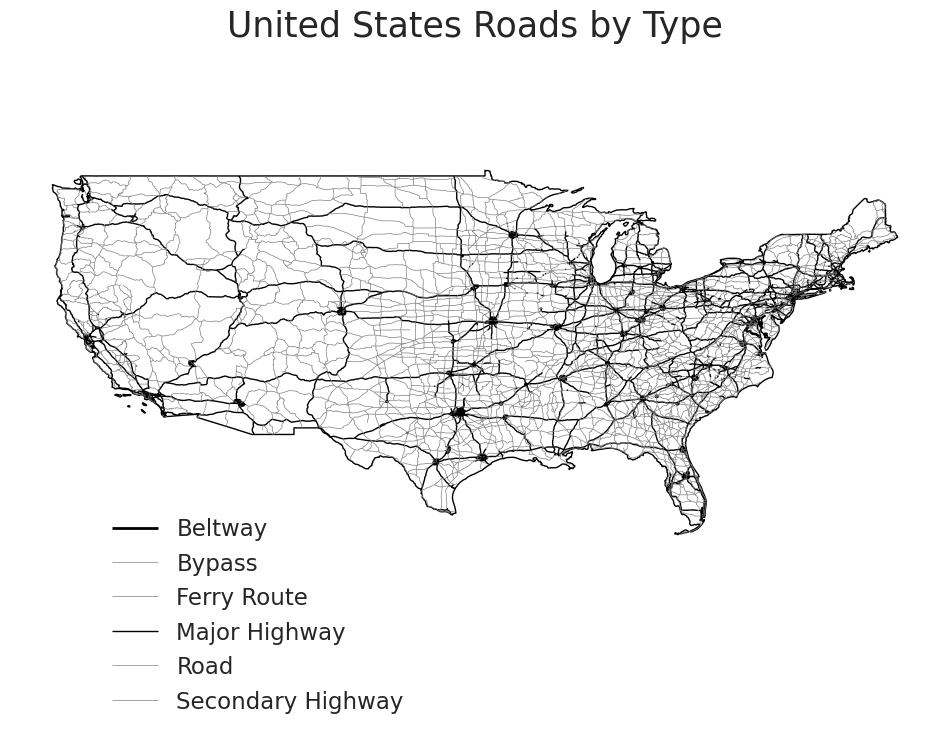

In [99]:
# Plot with a custom legend

# First, create a dictionary with the attributes of each legend item
road_attrs = {'Beltway': ['black', 2],
              'Secondary Highway': ['grey', .5],
              'Road': ['grey', .5],
              'Bypass': ['grey', .5],
              'Ferry Route': ['grey', .5],
              'Major Highway': ['black', 1]}

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

for ctype, data in us_road.groupby('type'):
    data.plot(color=road_attrs[ctype][0],
              label=ctype,
              ax=ax,
              linewidth=road_attrs[ctype][1])

country_boundary_us.plot(alpha=1, color="white", edgecolor="black", ax=ax)

ax.legend(frameon=False,
          loc = (0.1, -0.1))

ax.set_title("United States Roads by Type", fontsize=25)
ax.set_axis_off()

plt.axis('equal')
plt.show()